# EXPLANATORY DATA ANALYSIS

salah satu proses memahami data menggunakan sebelum melalukan pemodelan lebih lanjut contoh seperti memahami struktur data, mendeteksi adanya hubungan, dan memberi ide hipotesis

### Churn Analysis

misalnya kuta menggunakan data ini

In [88]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/adin786/bank_churn/refs/heads/main/data/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


# Unit of Analysis

Dalam tahap ini kita akan mengidentifikasi apa yang diceritakan/ditampilkan dalam 1 baris dataset

In [89]:
data['CLIENTNUM'].value_counts()

,count
CLIENTNUM,
714337233,1
768805383,1
818770008,1
713982108,1
769911858,1
...,...
709327383,1
806160108,1
753327333,1


Unit of analysis dari dataset ini adalah dat-entity level dimana tidak ada id yang duplikat dalam dataset ini

In [90]:
#kolom pad dataset ini
import pandas as pd
columns = [i for i in data.columns.tolist()]
columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Unnamed: 21']

jadi berdasarkan tipe variabel nya

In [91]:
data_understanding  = pd.DataFrame(columns=['nama kolom','tipe variabel','penjelasan'])
data_understanding['nama kolom'] = columns
data_understanding['tipe variabel'] = [
    'entitas',
    'perilaku',
    'demografi',
    'demografi',
    'demografi',
    'demografi',
    'demografi',
    'demografi',
    'finansial',
    'waktu',
    'perilaku',
    'perilaku',
    'perilaku',
    'finansial',
    'finansial',
    'finansial',
    'finansial',
    'finansial',
   'finansial',
    'finansial',
    'finansial',
    'finansial',


]
data_understanding

,nama kolom,tipe variabel,penjelasan
0,CLIENTNUM,entitas,NaN
1,Attrition_Flag,perilaku,NaN
2,Customer_Age,demografi,NaN
3,Gender,demografi,NaN
4,Dependent_count,demografi,NaN
5,Education_Level,demografi,NaN
6,Marital_Status,demografi,NaN
7,Income_Category,demografi,NaN
8,Card_Category,finansial,NaN
9,Months_on_book,waktu,NaN


### Distribusi variabel y
kegunaaanya untuk mengetahui apakah variabel y ini imbalance atau tidak

In [92]:
# variabel y
data['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


Tujuan EDA adalah memahami kondisi data apa adanya meskipun data yang kita punya itu tidak imbalance secara proporsional, maka kita bisa melakukan EDA untuk mengetauhui karakteristik data, pertama-tama kita akan melakukan univariate data terlebih dahulu

# Univariate
Univariate analysis adalah analisis yang fokus ke satu variabel saja, tanpa mempertimbangkan hubungannya dengan variabel lain. kenapa ini penting karena jika hanya menggunakan bivariate kita tidak tau konteks per individu variabel nya tidak tai sifat dan karakteristik masing-masing variabel

In [93]:
## contoh univariate analysis
#melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [94]:
#nununqiue -> jumlah nilai unik dalam suatu kolom
for i in data.columns.tolist():
  print("variabel",i,"memiliki",data[i].nunique(),'nilai unik')


variabel CLIENTNUM memiliki 10127 nilai unik
variabel Attrition_Flag memiliki 2 nilai unik
variabel Customer_Age memiliki 45 nilai unik
variabel Gender memiliki 2 nilai unik
variabel Dependent_count memiliki 6 nilai unik
variabel Education_Level memiliki 7 nilai unik
variabel Marital_Status memiliki 4 nilai unik
variabel Income_Category memiliki 6 nilai unik
variabel Card_Category memiliki 4 nilai unik
variabel Months_on_book memiliki 44 nilai unik
variabel Total_Relationship_Count memiliki 6 nilai unik
variabel Months_Inactive_12_mon memiliki 7 nilai unik
variabel Contacts_Count_12_mon memiliki 7 nilai unik
variabel Credit_Limit memiliki 6205 nilai unik
variabel Total_Revolving_Bal memiliki 1974 nilai unik
variabel Avg_Open_To_Buy memiliki 6813 nilai unik
variabel Total_Amt_Chng_Q4_Q1 memiliki 1158 nilai unik
variabel Total_Trans_Amt memiliki 5033 nilai unik
variabel Total_Trans_Ct memiliki 126 nilai unik
variabel Total_Ct_Chng_Q4_Q1 memiliki 830 nilai unik
variabel Avg_Utilization_Ra

In [95]:
#Ringkasan statistik dengan emnggunakan .describe()
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [96]:
## univariate
data_var = data.drop(['CLIENTNUM'],axis=1)
stat = data.describe()
#penduggan awal skewness tingkat kemiringan data berdasarkan data mean, mean, dan std
def measure_skew(x):
  skew_ratio = (stat.loc['mean',x] - stat.loc['50%',x])/stat.loc['std',x]
  return skew_ratio

all_skew = [measure_skew(i) for i in stat.columns.tolist()]
stat_summary = pd.DataFrame(columns=['columns','skew_ration']);
stat_summary['columns'] = stat.columns.tolist()
stat_summary['skew_ration'] = all_skew
stat_summary['skewness'] = stat_summary['skew_ration'].apply(lambda x : 'right' if x > 0  else 'left')
stat_summary

,columns,skew_ration,skewness
0,CLIENTNUM,0.575856,right
1,Customer_Age,0.040660,right
2,Dependent_count,0.266534,right
3,Months_on_book,-0.008964,left
4,Total_Relationship_Count,-0.120573,left
5,Months_Inactive_12_mon,0.337581,right
6,Contacts_Count_12_mon,0.411596,right
7,Credit_Limit,0.449230,right
8,Total_Revolving_Bal,-0.138881,left
9,Avg_Open_To_Buy,0.439476,right


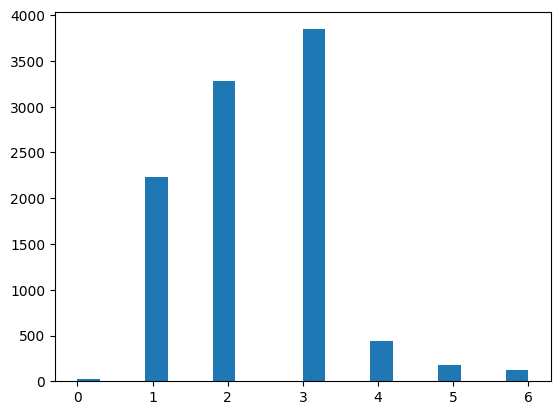

In [97]:
#contoh bentuk skewness
# misal variabel credit limit skewness nya ke kanan
from matplotlib import pyplot as plt
plt.hist(data['Months_Inactive_12_mon'],bins=20)
plt.show()

# Deteksi Outlier
menggunakan quartile 25, 50, dan 75% untuk mendeteksi outlier cocok digunakan karena tidak terpengaruh oleh distribusi dan nilai ekstrem, kita bisa menggunakan boxplot untuk melihat adanya outlier atau tidak

In [98]:
stat

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


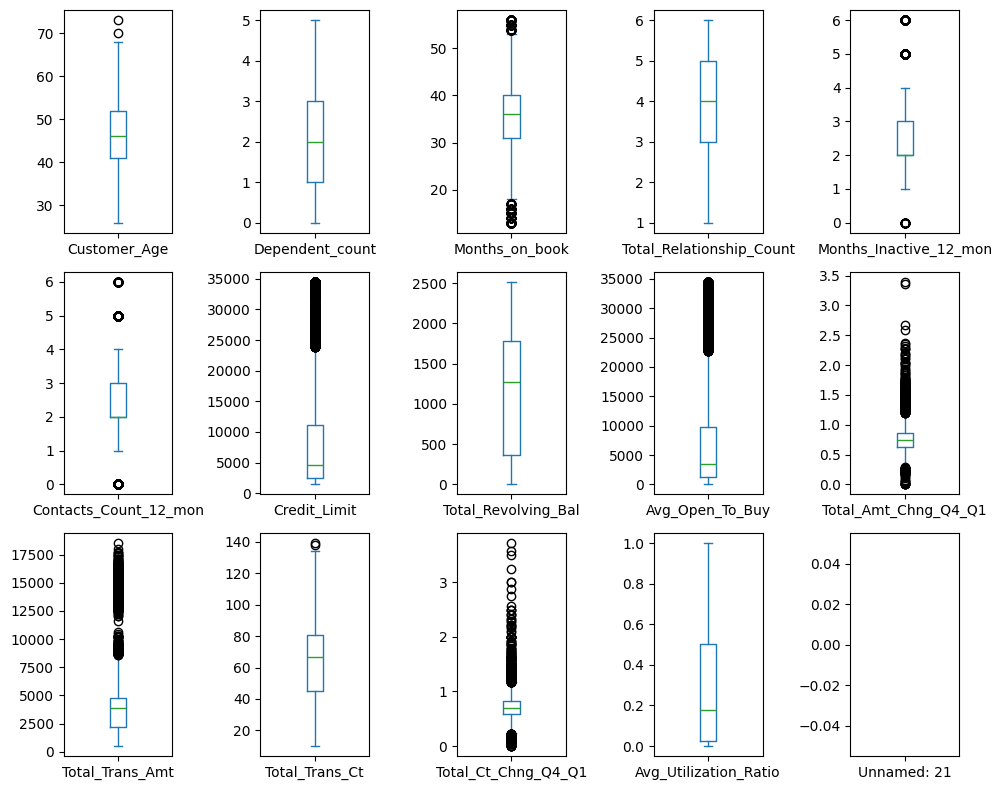

In [99]:
from matplotlib import pyplot as plt
#buat subolot
fig,ax = plt.subplots(3,5,figsize=(10,8))
#biar enakk di loopnya kita flat kan
ax = ax.flat
kol = [i for i in stat.columns.tolist() if i != 'CLIENTNUM']

for i,j in zip(kol,ax):
  data_var[i].plot(kind='box',ax=j)
#rapikan plotnya
plt.tight_layout()


cara menceritakan dari gambar menjadi text yang benar :
1. fakta
2. insight
paling bagus kelompokan per tipe variabel ya
contoh demografi
- Dari umur customer persebaran terpusat di umur 40-50 tahun customer pada bank ini didominasi oleh orang dewasa
- Untu jumlah tanggungan juga terpusat di 1 sampai 3 orang, artinya at least customer bank ini memiliki tanggungan orang

kemudian untuk tipe variabel waktu
- 3 - 4 bulan bank melakukan komunikasi intens dengan customer dilihati dari total relationship count
- kemudian dalam 12 bulan/1 tahun konsumen tidak aktif menggunakan layanan bank adalah 2-3 bulan tergolong menengah, harapnnya bisa diminimalkan serendah mungkin

Kemudian Variabel finansial
- Credit Limit menunjukan batas pemakaian yang bisa customer pakai, berkisar 0 - 10000 which is tergolong rendah karena besar kecilnya credit limit menurut domain knowledge mempengaruhi tingkat kepercaayaan bank kepada customer

### Catatan jangan tolak mentah2 apa yang disajikan dalam gambar
Contoh diatas kita tahu bahwa beberapa kolom memilik outlier atau tidak, namun dalam aplikasinya kita harus check lebih lanjut apakah data yang termasuk outlier ini sbb
- masuk akal/sesuai konteks domainnya atau tidak
-  tidak ada verifikasi statistik jadi perlu perhitungan menggunakan IQR atau zscore lebih lanjut
-  boxplot itu rentan efek skala

jadi di univariete analysis kita hanya menandai sample mana saja yang termasuk outlier atau tidak dengan menggunakan perhitungan iqr atau zscore


In [100]:
def check_outler(i):
  quartile_25 = data[i].quantile(0.25);
  quartile_75 = data[i].quantile(0.75);
  iqr = quartile_75 - quartile_25
  #subset the data
  upper_bound = quartile_75 + (1.5 * iqr)
  lower_bound = quartile_25 - (1.5 * iqr)
  data_subset = data[(data[i] > upper_bound) | (data[i] < lower_bound)]
  return data_subset.index.tolist() ## ambil daftar index nya

df_outlier = pd.DataFrame(columns=['kol','list_sample'])
df_outlier['kol'] = kol
df_outlier['list_sample'] = [check_outler(i) for i in kol]
df_outlier


,kol,list_sample
0,Customer_Age,"[251, 254]"
1,Dependent_count,[]
2,Months_on_book,"[11, 18, 27, 39, 52, 108, 151, 177, 182, 187, ..."
3,Total_Relationship_Count,[]
4,Months_Inactive_12_mon,"[12, 29, 31, 108, 118, 163, 201, 202, 313, 319..."
5,Contacts_Count_12_mon,"[2, 4, 8, 12, 20, 29, 41, 46, 53, 56, 80, 85, ..."
6,Credit_Limit,"[6, 7, 16, 40, 45, 61, 63, 65, 69, 70, 74, 79,..."
7,Total_Revolving_Bal,[]
8,Avg_Open_To_Buy,"[6, 7, 16, 40, 45, 61, 65, 69, 70, 79, 81, 84,..."
9,Total_Amt_Chng_Q4_Q1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16,..."


# **Univariate tipe kategorikal**
recall kembali


In [101]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [102]:
#definiskan mana variabel kategorical
# variabel kategorikal bisa berbentuk string atau number tapi menunjukan label kelas
kol = data.columns.tolist()
for i in kol:
  print(f'kolom {i} memiliki {data[i].nunique()}')

kolom CLIENTNUM memiliki 10127
kolom Attrition_Flag memiliki 2
kolom Customer_Age memiliki 45
kolom Gender memiliki 2
kolom Dependent_count memiliki 6
kolom Education_Level memiliki 7
kolom Marital_Status memiliki 4
kolom Income_Category memiliki 6
kolom Card_Category memiliki 4
kolom Months_on_book memiliki 44
kolom Total_Relationship_Count memiliki 6
kolom Months_Inactive_12_mon memiliki 7
kolom Contacts_Count_12_mon memiliki 7
kolom Credit_Limit memiliki 6205
kolom Total_Revolving_Bal memiliki 1974
kolom Avg_Open_To_Buy memiliki 6813
kolom Total_Amt_Chng_Q4_Q1 memiliki 1158
kolom Total_Trans_Amt memiliki 5033
kolom Total_Trans_Ct memiliki 126
kolom Total_Ct_Chng_Q4_Q1 memiliki 830
kolom Avg_Utilization_Ratio memiliki 964
kolom Unnamed: 21 memiliki 0


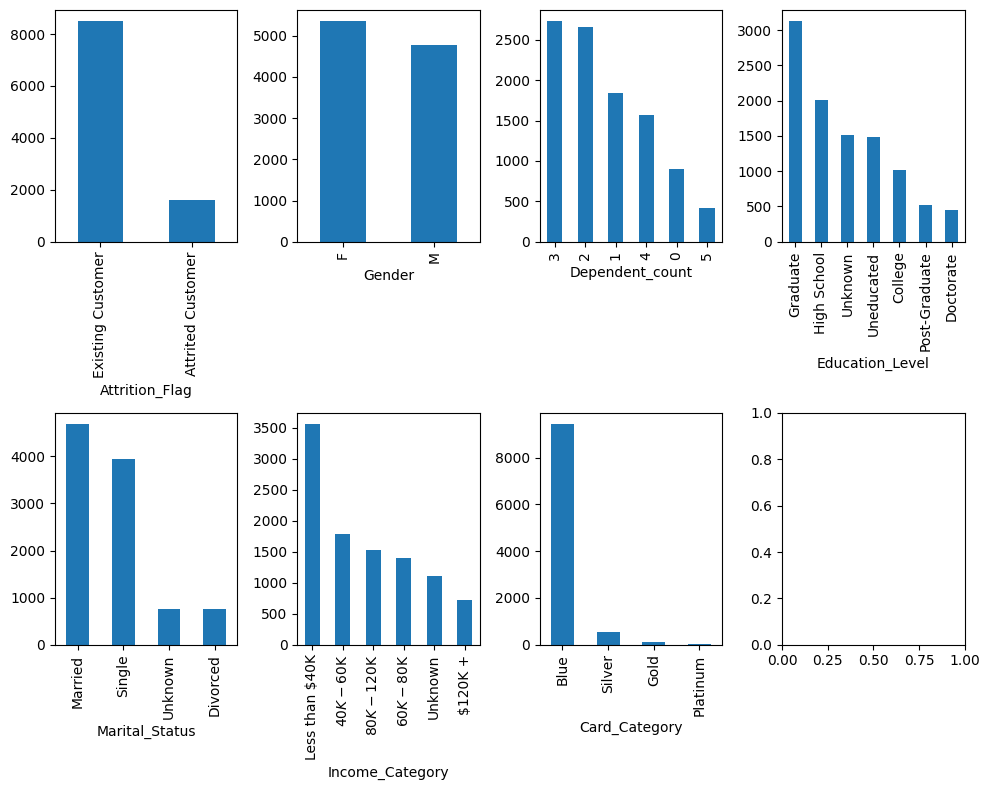

In [103]:
#kol_cat
kol_cat = ['Attrition_Flag','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category']
from matplotlib import pyplot as plt
fig,ax = plt.subplots(2,4,figsize=(10,8))
ax = ax.flat
for i,j in zip(kol_cat,ax):
  #hitung proporsi
  table_summary = data[i].value_counts()
  #tampilkan dengan bar
  table_summary.plot(kind='bar',ax=j)
plt.tight_layout()

Berdasarkan gambar  di atas :
- jumlah sample pada dataset ini didominasi existing customer which is bagus, nah analisis ini ingin tahu penyebab sisa customer yang churn yang ditunjukan oleh attrited customer
- Untuk Gender juga relative seimbang antara laki-laki dan perempuan, emnunjukan bahwa menjangkau semua konsumen berdasarkan gender
- jumlah tanggungan didominasi 3 - 2 dimana ini  menunjukan juga yang menggunakan layanan ini reasonnya sebabnya karena jumlah tanggungan yang mana berkorelasi dengan beban ekonomi yang dimiliki oleh customer
- Status pernikahan didominasi orang sudah menikah karena beban ekonomi tadi otomatis customer mencari opsi-opsi lain untuk pembiayaan
- Untuk gaji yang dimiliki didominasi juga kurang dari 10 k menunjukan kebanyakana customer berasal dari kecil menengah
- hal itu juga dikuatkan dengan banyaknya jenis kartu kredit berasala dari jenis kartu B which is yang paling rendah/dasar

## ANALISIS BIVARIATE

In [104]:
# berdaarkan tipe variabel vs y
# recall
data_understanding

,nama kolom,tipe variabel,penjelasan
0,CLIENTNUM,entitas,NaN
1,Attrition_Flag,perilaku,NaN
2,Customer_Age,demografi,NaN
3,Gender,demografi,NaN
4,Dependent_count,demografi,NaN
5,Education_Level,demografi,NaN
6,Marital_Status,demografi,NaN
7,Income_Category,demografi,NaN
8,Card_Category,finansial,NaN
9,Months_on_book,waktu,NaN


### Demografi

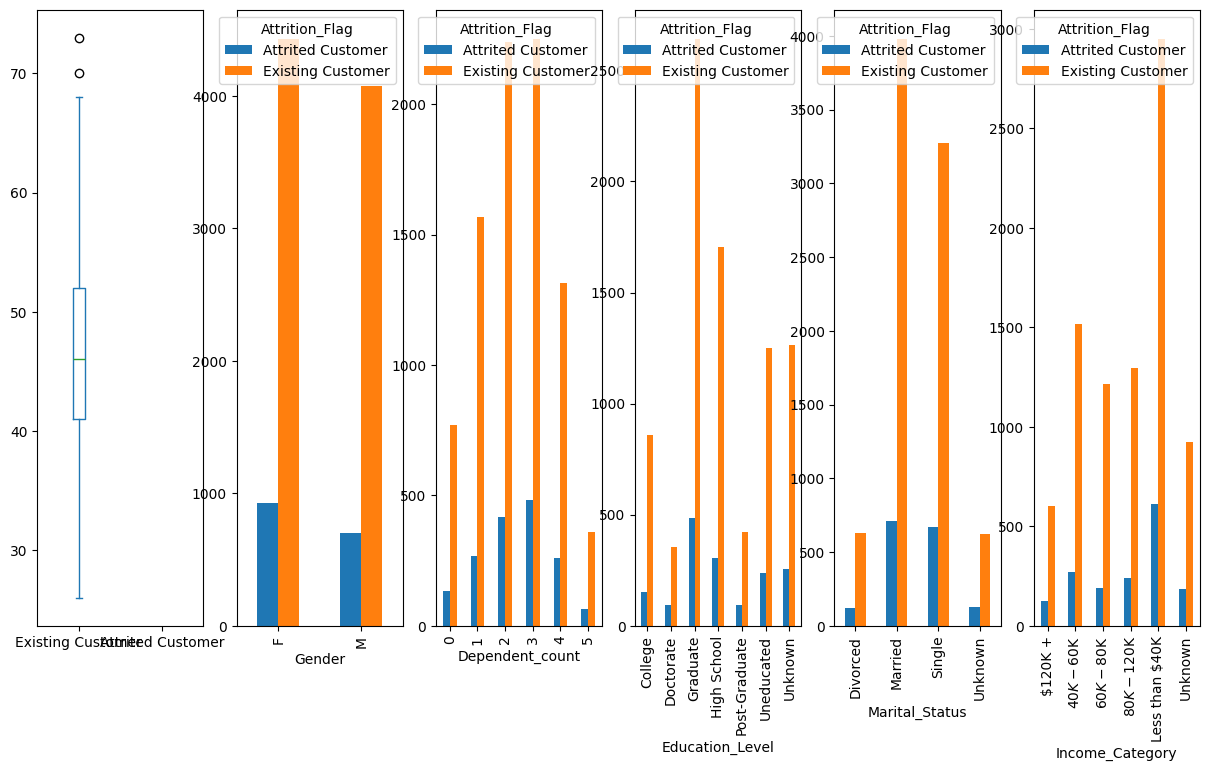

In [105]:
#subset data
data_demografi_kol = data_understanding[data_understanding['tipe variabel'] == 'demografi']['nama kolom'].tolist()
variabel_y = 'Attrition_Flag'
data_demo = data[data_demografi_kol]
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,len(data_demografi_kol),figsize=(15,8))
ax = ax.flat
for i,j in zip(data_demo.columns.tolist(),ax):
  nilai_unik = data[i].nunique()
  if nilai_unik > 10:
      #groupby, di unstack untuk variabel_y jadi kolom
      unik_y = data['Attrition_Flag'].unique().tolist()
      box_data = pd.DataFrame()
      for k in unik_y:
        box_data[k] = data[data['Attrition_Flag'] == k][i]
      box_data.plot(kind='box',ax=j)
  else:
    #groupby
    group_dat = data.groupby([i,variabel_y]).size().unstack()
    group_dat.plot(kind='bar',ax=j)

didominasi oleh existing customer karena pada dataset ini paling banyak didominasi pleh existing cutomer sehingga menjadi bias pada plot yang dibentuk ini, supaya nggak bias kita akan menggunakan proporsi dan dibandingkan dengan masing-masing kelompok misal kelompok men sendiri kelompok female juga sendiri

In [106]:
data.groupby('Gender')['Attrition_Flag'].value_counts(normalize=True).unstack()

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848


Existing Customer
Attrited Customer


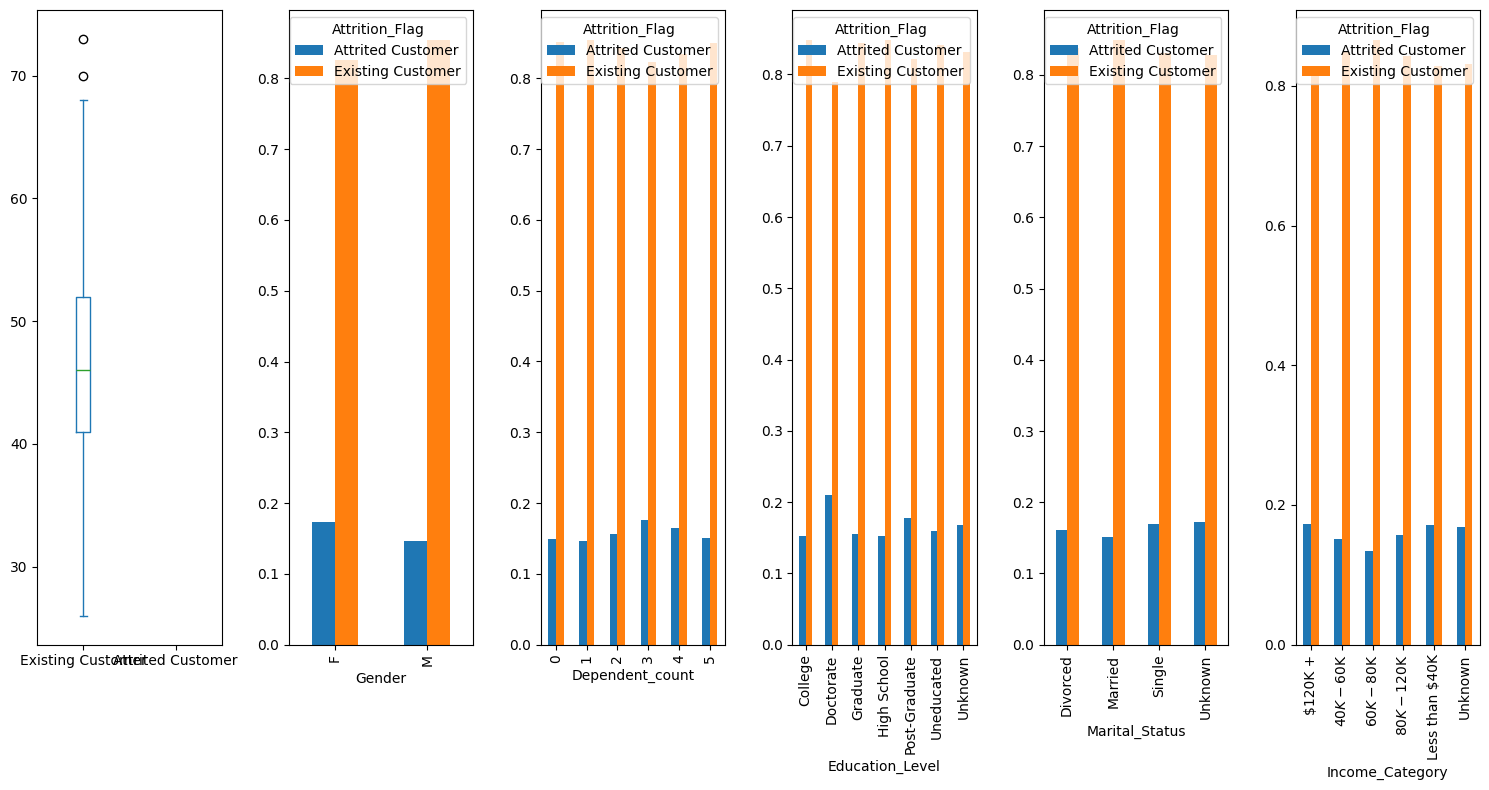

In [107]:
#subset data
data_demografi_kol = data_understanding[data_understanding['tipe variabel'] == 'demografi']['nama kolom'].tolist()
variabel_y = 'Attrition_Flag'
data_demo = data[data_demografi_kol]
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,len(data_demografi_kol),figsize=(15,8))
ax = ax.flat
for i,j in zip(data_demo.columns.tolist(),ax):
  nilai_unik = data[i].nunique()
  if nilai_unik > 10:
      #groupby, di unstack untuk variabel_y jadi kolom
      unik_y = data['Attrition_Flag'].unique().tolist()
      box_data = pd.DataFrame()
      for k in unik_y:
        box_data[k] = data[data['Attrition_Flag'] == k][i]
        print(k)
      box_data.plot(kind='box',ax=j)
  else:
    #groupby
    group_dat = data.groupby(i)[variabel_y].value_counts(normalize=True).unstack()
    group_dat.plot(kind='bar',ax=j)

plt.tight_layout()

## Variabel finansial

kita akan menggunakan seaborn untuk visualasi boxplot


<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

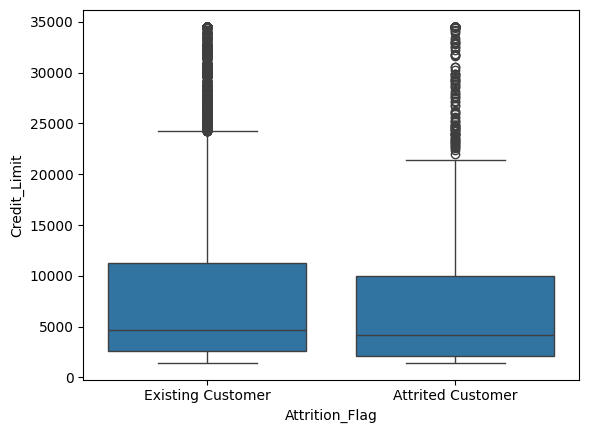

In [108]:
import seaborn as sns
sns.boxplot(x='Attrition_Flag',y = 'Credit_Limit',data=data)

/tmp/ipython-input-2819906290.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(['e','a'])
/tmp/ipython-input-2819906290.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(['e','a'])
/tmp/ipython-input-2819906290.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(['e','a'])
/tmp/ipython-input-2819906290.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(['e','a'])
/tmp/ipython-input-2819906290.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(['e','a'])
/tmp/ipython-input-2

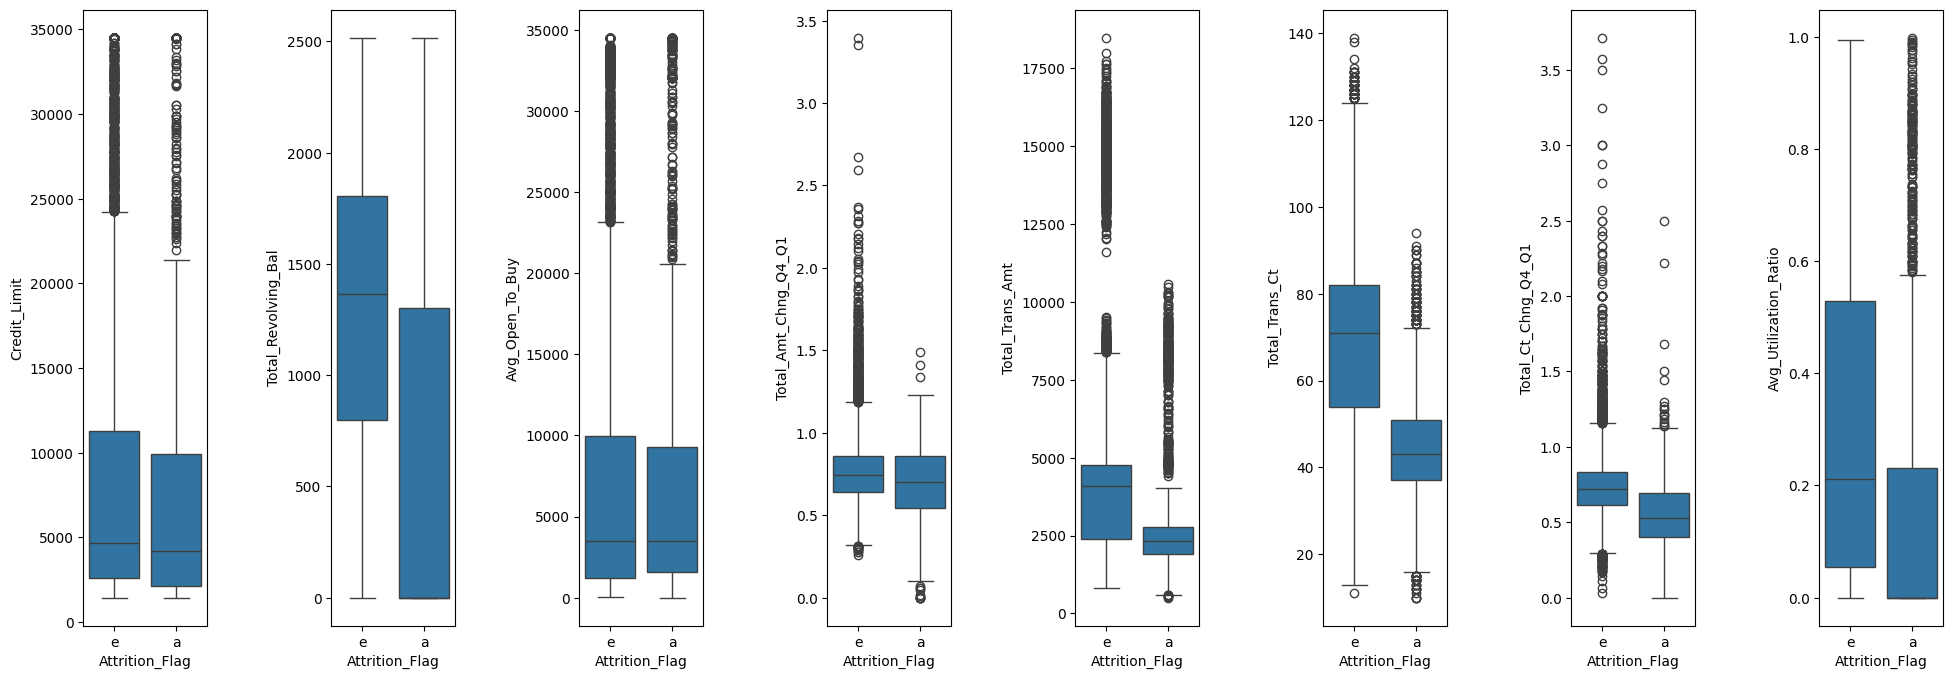

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt

#subset data
data_fin_kol = data_understanding[data_understanding['tipe variabel'] == 'finansial']['nama kolom'].tolist()
variabel_y = 'Attrition_Flag'
#filtering kolom
data_demo = data[[i for i in data_fin_kol if i != 'Card_Category' and i != "Unnamed: 21"]]
fig,ax = plt.subplots(1,len(data_demo.columns.tolist()),figsize=(24,8))
ax = ax.flat
#plot menggunakan seaborn
for i,j in zip(data_demo.columns.tolist(),ax):
  sns.boxplot(x=variabel_y,y=i,data=data,ax=j)
  #ganti xtick label dengan ini
  j.set_xticklabels(['e','a'])
plt.subplots_adjust(wspace=1)

dari gambar di atas attrited customer dipengaruhi oleh total trans amount `(jumlah total transaksi), total trans ct (jumlah frekuensi transaksi) dan total_ct_q4_q1 (jumlsh perubahan antar transaksi tiap kuartal), masuk akal karena untuk customer churn akan sangat jarang melakukan transaksi hal ini
berdampak pada nilai nilai transaksi yang dilakukan dan julah frekuensi transaksi dilakkan

### Perilaku

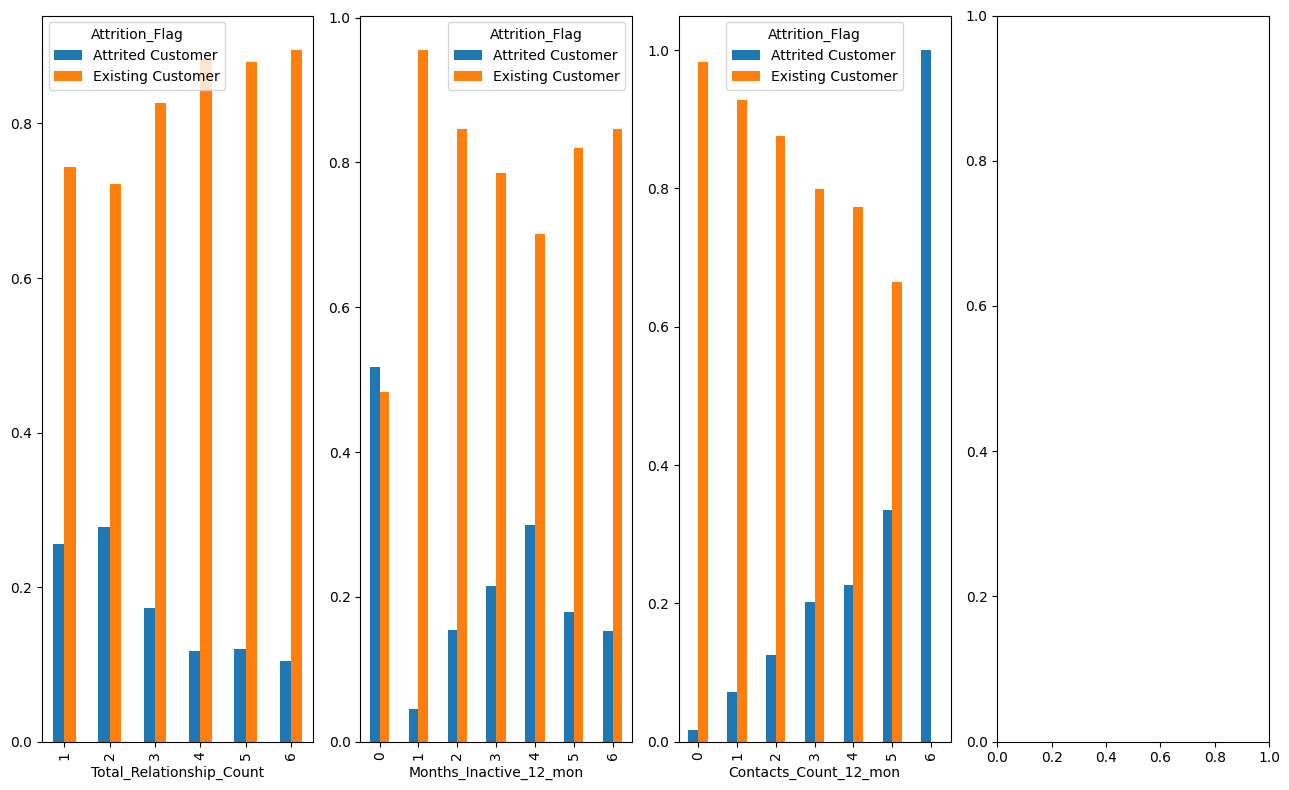

In [110]:
#subset data
data_per = data_understanding[data_understanding['tipe variabel'] == 'perilaku']['nama kolom'].tolist()
variabel_y = 'Attrition_Flag'
data_demo = data[[i for i in data_per if i != 'Attrition_Flag']]
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,len(data_per),figsize=(13,8))
ax = ax.flat
for i,j in zip(data_demo.columns.tolist(),ax):
  nilai_unik = data[i].nunique()
  if nilai_unik > 10:
      #groupby, di unstack untuk variabel_y jadi kolom
      unik_y = data['Attrition_Flag'].unique().tolist()
      box_data = pd.DataFrame()
      for k in unik_y:
        box_data[k] = data[data['Attrition_Flag'] == k][i]
        print(k)
      box_data.plot(kind='box',ax=j)
  else:
    #groupby
    group_dat = data.groupby(i)[variabel_y].value_counts(normalize=True).unstack()
    group_dat.plot(kind='bar',ax=j)

plt.tight_layout()

berdasarkan gambar di atas
- Untuk variabel contact_count_12_mon semakin lama customer menghubungi CS bank, semakin kuat peluang customer churn hal itu bisa diebabkan karena masalah yang tidak terselesaikan
- Pada variabel mont inactive 12 month terdpat anomali

In [111]:
#check sample size per kelas month
data.groupby('Months_Inactive_12_mon')[variabel_y].size()

,Attrition_Flag
Months_Inactive_12_mon,
0,29
1,2233
2,3282
3,3846
4,435
5,178
6,124


# ANALISIS MULTIVARIATE

dari analisis bivariate terbukti bahwa :
- total transaksi
- total frekuensi transaksi
- todak perubahan frekuensi dalam kuartal
- seberap intens konsumen berkomunikasi dengan bank

ada hubungan dengan Attrition_flag secara visually sehingga kita analisis lanjut di multivariate

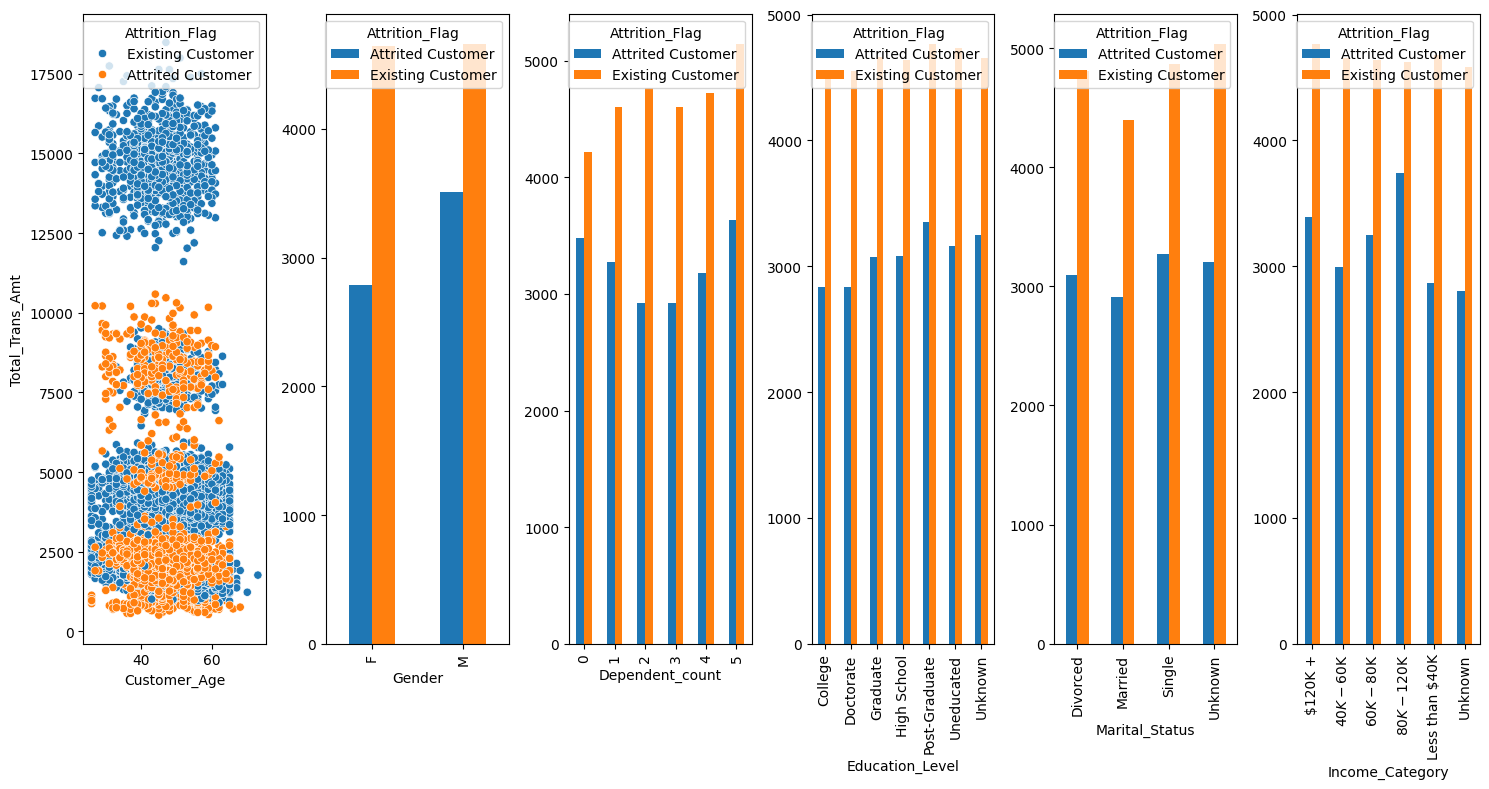

In [112]:
#mengetahui pengaruh persona konsumen
from matplotlib import pyplot as plt
import seaborn as sns
#demografi
data_demografi_kol = data_understanding[data_understanding['tipe variabel'] == 'demografi']['nama kolom'].tolist()
fig,ax = plt.subplots(1,len(data_demografi_kol),figsize=(15,8))
ax = ax.flat
for i,j in zip(data_demografi_kol,ax):
  if i != 'Customer_Age':
    data.groupby([i,'Attrition_Flag'])['Total_Trans_Amt'].mean().unstack().plot(kind='bar',ax=j)
  else:
    #hubungan antar numerik gunakan scatter plot, dengan hue(penanda) attrition flag
    sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=data, ax=j)


plt.tight_layout()

dari analisis multivariate EDA
- aspek demografi sebagai profiling gagal membentuk atau mengetahui demografi attrited konsumen, sehingga aspek demografi bersifat netral

### total transacktion frequency

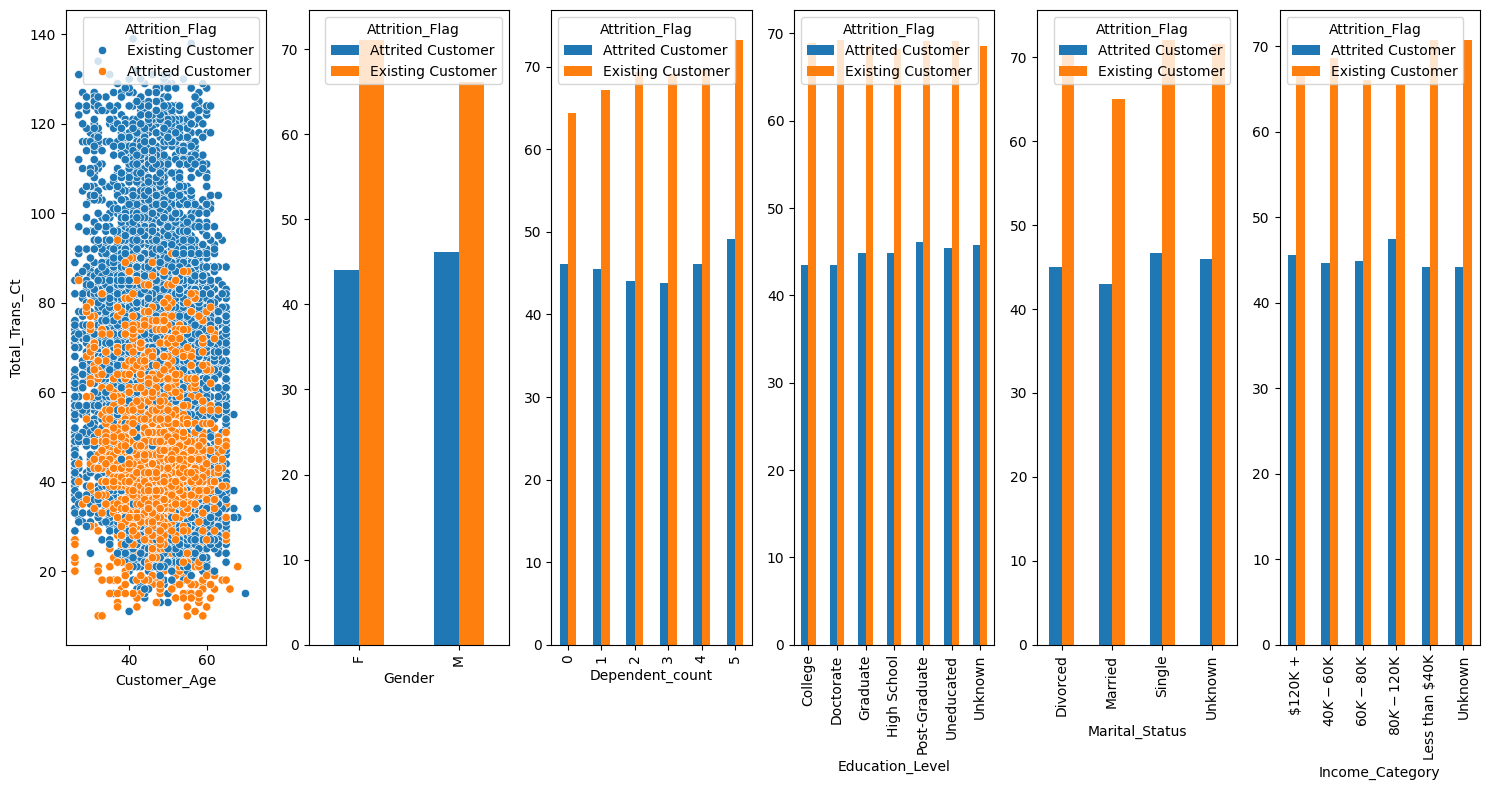

In [113]:
#mengetahui pengaruh persona konsumen
from matplotlib import pyplot as plt
import seaborn as sns
#demografi
data_demografi_kol = data_understanding[data_understanding['tipe variabel'] == 'demografi']['nama kolom'].tolist()
fig,ax = plt.subplots(1,len(data_demografi_kol),figsize=(15,8))
ax = ax.flat
for i,j in zip(data_demografi_kol,ax):
  if i != 'Customer_Age':
    data.groupby([i,'Attrition_Flag'])['Total_Trans_Ct'].mean().unstack().plot(kind='bar',ax=j)
  else:
    #hubungan antar numerik gunakan scatter plot, dengan hue(penanda) attrition flag
    sns.scatterplot(x='Customer_Age', y='Total_Trans_Ct', hue='Attrition_Flag', data=data, ax=j)


plt.tight_layout()

sama seperti dengan transaction amount, aspek demografi gagal membentuk segmen customer secara visual dalam hasil bivariate total transaction count vs atrition flag

# KESIMPULAN

Kesimpulannya adalah aspek demografi tidak terlallu berpengaruh terhadapa churn customer, melainkan faktor finansial, seperti jumlah transaksinya, jumlah frekuensi transaksi yang dilakukan oleh customer, dan seberapa sering customer berhubungan dengan bank menjadi faktor pengaruh kemungkinan churn customer
